<h1 style="text-align:center">Detecting Invoice Fraud Using Agentic AI:</h1>
<h1 style="text-align:center">A Case Study on the FATURA Multi-Layout Invoice Dataset</h1>


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
!jupyter nbconvert --to html "/content/drive/MyDrive/DBA-MS-AIML/MS-Capstone/notebooks/EDA.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/DBA-MS-AIML/MS-Capstone/notebooks/EDA.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 571248 bytes to /content/drive/MyDrive/DBA-MS-AIML/MS-Capstone/notebooks/EDA.html


In [4]:
# Imports

import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
print(sns.__version__)
print(matplotlib.__version__)

0.13.2
3.10.0


## **Analysis**

<h4 style="color:indianred"><em> <ins>Import the data:</ins></em></h4>

In [6]:
CLEAN_DIR = "/content/drive/MyDrive/DBA-MS-AIML/MS-Capstone/data/csv_files/cleaned_data"

files = sorted([
    f for f in os.listdir(CLEAN_DIR)
    if f.endswith("_clean.csv")
])

files

['template1_clean.csv',
 'template2_clean.csv',
 'template3_clean.csv',
 'template4_clean.csv',
 'template5_clean.csv']

In [7]:
dfs = []

for file in files:
    path = os.path.join(CLEAN_DIR, file)
    df = pd.read_csv(path)

    # Add source metadata
    template_name = file.replace("_clean.csv", "")
    df["source_template"] = template_name

    dfs.append(df)

data = pd.concat(dfs, ignore_index=True)

data.shape

(1000, 49)

In [8]:
data.head()

,BUYER,BUYER_addr_line1,BUYER_addr_line2,BUYER_city_state_postal_country,BUYER_email,BUYER_name,BUYER_raw,BUYER_site,BUYER_tel,CURRENCY,...,TOTAL,TOTAL_AMOUNT,TOTAL_WORDS,_source_file,source_template,GST(7%),GSTIN,NUMBER,SELLER_NAME,BILL_TO
0,Bill to:Denise Perez\n16424 Timothy Mission\nM...,16424 Timothy Mission,"Markville, AK 58294 US",NaN,melvin40@example.net,Bill to:Denise Perez,Bill to:Denise Perez | 16424 Timothy Mission |...,http://smith.org/,+(352)259-8443,EUR,...,TOTAL : 734.33 EUR,734.33,Total in words: seven hundred and thirt-\ny-f...,Template1_Instance0.json,template1,NaN,NaN,NaN,NaN,NaN
1,Buyer :Timothy Clark\n62035 Daniel Cove Suite ...,62035 Daniel Cove Suite 917,"Griffinport, ND 45912 US",NaN,millschristopher@example.com,Buyer :Timothy Clark,Buyer :Timothy Clark | 62035 Daniel Cove Suite...,https://www.cole.com/,+(038)419-8330,EUR,...,TOTAL : 1357.49 EUR,7.49,"Total in words: one thousand, three hundred a...",Template1_Instance1.json,template1,NaN,NaN,NaN,NaN,NaN
2,Bill to:Angel Bailey\n265 Ochoa Manors Apt. 51...,265 Ochoa Manors Apt. 518,"North John, MD 41885 US",NaN,baileygary@example.net,Bill to:Angel Bailey,Bill to:Angel Bailey | 265 Ochoa Manors Apt. 5...,https://www.mccormick.com/,+(675)553-3428,EUR,...,TOTAL : 744.38 EUR,744.38,Total in words: seven hundred and forty-\n-fo...,Template1_Instance10.json,template1,NaN,NaN,NaN,NaN,NaN
3,Bill to:Daniel Dalton\n3324 Price Divide Suite...,3324 Price Divide Suite 903,"North Pamela, GU 60539 US",NaN,mcdanielchristopher@example.net,Bill to:Daniel Dalton,Bill to:Daniel Dalton | 3324 Price Divide Suit...,https://west.com/,+(080)666-8294,EUR,...,TOTAL : 967.02 EUR,967.02,Total in words: nine hundred and sixt-\ny-sev...,Template1_Instance100.json,template1,NaN,NaN,NaN,NaN,NaN
4,Buyer :Dan Acosta\n525 Michael Vista\nNorth Ki...,525 Michael Vista,"North Kimberlychester, GU 17479 US",NaN,chelseaunderwood@example.com,Buyer :Dan Acosta,Buyer :Dan Acosta | 525 Michael Vista | North ...,http://rivera.info/,+(792)992-4731,USD,...,TOTAL : 626.27 USD,626.27,Total in words: six hundred and twent-\ny-six...,Template1_Instance101.json,template1,NaN,NaN,NaN,NaN,NaN


<ins><strong>Observation:</strong></ins>

The consolidated dataset contains invoices from multiple cleaned templates combined into a single analysis-ready structure. The inclusion of a source_template identifier enables stratified analysis, allowing patterns and variations to be examined across invoice layouts without losing provenance or interpretability.

### Exploratory Data Analysis

####<h4 style="color:indianred"><em>1. <ins>Dataset Structure Overview:</ins></em></h4>

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 49 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BUYER                             600 non-null    object 
 1   BUYER_addr_line1                  600 non-null    object 
 2   BUYER_addr_line2                  600 non-null    object 
 3   BUYER_city_state_postal_country   0 non-null      float64
 4   BUYER_email                       600 non-null    object 
 5   BUYER_name                        600 non-null    object 
 6   BUYER_raw                         600 non-null    object 
 7   BUYER_site                        600 non-null    object 
 8   BUYER_tel                         600 non-null    object 
 9   CURRENCY                          1000 non-null   object 
 10  DATE                              1000 non-null   object 
 11  DATE_NORM                         1000 non-null   object 
 12  DISCOUN

####<h4 style="color:indianred"><em>2. <ins>Column Inventory Table</ins></em></h4>

In [10]:
column_summary = pd.DataFrame({
    "Column": data.columns,
    "Data Type": data.dtypes.values,
    "Non-Null Count": data.notnull().sum().values,
    "Missing %": (data.isnull().mean() * 100).round(2).values
})

column_summary.sort_values("Missing %", ascending=False).head(15)

,Column,Data Type,Non-Null Count,Missing %
3,BUYER_city_state_postal_country,float64,0,100.0
31,SELLER_site,float64,0,100.0
27,SELLER_city_state_postal_country,float64,0,100.0
28,SELLER_email,float64,0,100.0
26,SELLER_addr_line2,float64,0,100.0
32,SELLER_tel,float64,0,100.0
16,GSTIN_BUYER,object,200,80.0
17,GSTIN_SELLER,object,200,80.0
24,SELLER_SITE,object,200,80.0
20,PAYMENT_DETAILS,object,200,80.0


####<h4 style="color:indianred"><em>3. <ins>Missingness Interpretation</ins></em></h4>

In [11]:
column_summary.describe()

,Non-Null Count,Missing %
count,49.000000,49.000000
mean,571.428571,42.857143
std,324.037035,32.403703
min,0.000000,0.000000
25%,400.000000,20.000000
50%,600.000000,40.000000
75%,800.000000,60.000000
max,1000.000000,100.000000


<ins><strong>Analytical Question:</strong></ins>

Is missing data random or structurally driven?

<ins><strong>Interpretation:</strong></ins>

Missing values are concentrated in specific fields such as tax identifiers and seller contact information and are strongly associated with invoice templates. This pattern indicates structurally induced missingness rather than data quality issues, emphasizing the importance of reasoning over incomplete information rather than discarding records through aggressive imputation.

<ins><strong>Key Insights Highlighted:</strong></ins>

* Structural missingness
* Supports agent-based reasoning

####<h4 style="color:indianred"><em>4. <ins>Invoice Templates Distribution Check</ins></em></h4>

In [12]:
data["source_template"].value_counts()

,count
source_template,
template1,200
template2,200
template3,200
template4,200
template5,200


/tmp/ipython-input-3112536365.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


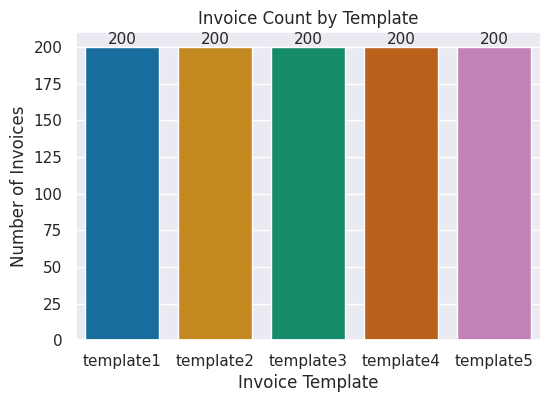

In [13]:
plt.figure(figsize=(6, 4))
sns.set_theme(style="darkgrid")
sns.set_context("notebook")

ax = sns.countplot(
    data=data,
    x="source_template",
    palette="colorblind"
)

for container in ax.containers:
    ax.bar_label(container, fontsize=11)

plt.title("Invoice Count by Template")
plt.xlabel("Invoice Template")
plt.ylabel("Number of Invoices")

plt.show()

<ins><strong>Analytical Question:</strong></ins>

Is the dataset balanced across invoice templates?

<ins><strong>Interpretation:</strong></ins>

The distribution of invoices across templates is approximately uniform, indicating a well-balanced dataset. This balance reduces template-induced bias and ensures that downstream comparisons across invoice layouts are methodologically sound. As a result, any observed performance differences in fraud detection models can be attributed to structural complexity rather than data imbalance.

<ins><strong>Key Insights Highlighted:</strong></ins>

* Balanced experimental design
* Valid cross-template evaluation

####<h4 style="color:indianred"><em>5. <ins>Currency Distribution</ins></em></h4>

In [14]:
data["CURRENCY"].value_counts()

,count
CURRENCY,
USD,658
EUR,342


/tmp/ipython-input-3942111871.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


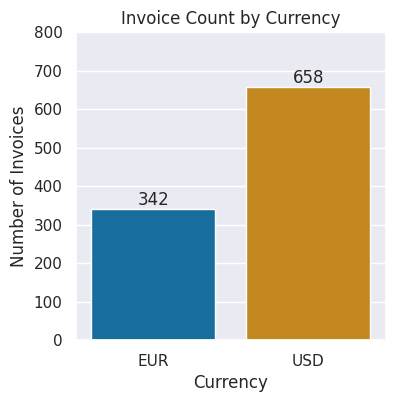

In [15]:
plt.figure(figsize=(4, 4))

ax = sns.countplot(
    data=data,
    x="CURRENCY",
    palette="colorblind"
)
for container in ax.containers:
    ax.bar_label(container)

# ax.bar_label(ax.containers[0])
plt.title("Invoice Count by Currency")
plt.xlabel("Currency")
plt.ylabel("Number of Invoices")
ax.set_ylim(top=800)
plt.show()

<ins><strong>Analytical Question:</strong></ins>

Does the dataset reflect a multi-currency operational environment?

<ins><strong>Interpretation:</strong></ins>

The dataset contains invoices denominated primarily in USD and EUR, reflecting a realistic multi-currency invoicing environment. This diversity necessitates currency-aware normalization and highlights potential challenges for rule-based systems that rely on fixed monetary thresholds, thereby motivating adaptive and context-aware modeling approaches.

<ins><strong>Key Insights Highlighted:</strong></ins>

* Multi-currency risk context
* Justification for normalization logic

####<h4 style="color:indianred"><em>6. <ins>Numeric EDA – TOTAL_AMOUNT</ins></em></h4>

In [16]:
data["TOTAL_AMOUNT"].describe()

,TOTAL_AMOUNT
count,1000.000000
mean,435.777370
std,288.594756
min,0.130000
25%,197.852500
50%,441.510000
75%,663.460000
max,995.530000


<ins><strong>Analytical Question:</strong></ins>

What is the central tendency and spread of invoice monetary values?

<ins><strong>Interpretation:</strong></ins>

Invoice total amounts exhibit a stable central tendency and moderate dispersion, remaining within expected operational bounds. The absence of extreme values suggests that monetary magnitude alone is insufficient for identifying anomalous invoices in this dataset.

<ins><strong>Key Insights Highlighted:</strong></ins>

* Monetary values are well-bounded
* Fraud detection must rely on contextual signals

####<h4 style="color:indianred"><em>7. <ins>TOTAL_AMOUNT by Template</ins></em></h4>

/tmp/ipython-input-2016095326.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


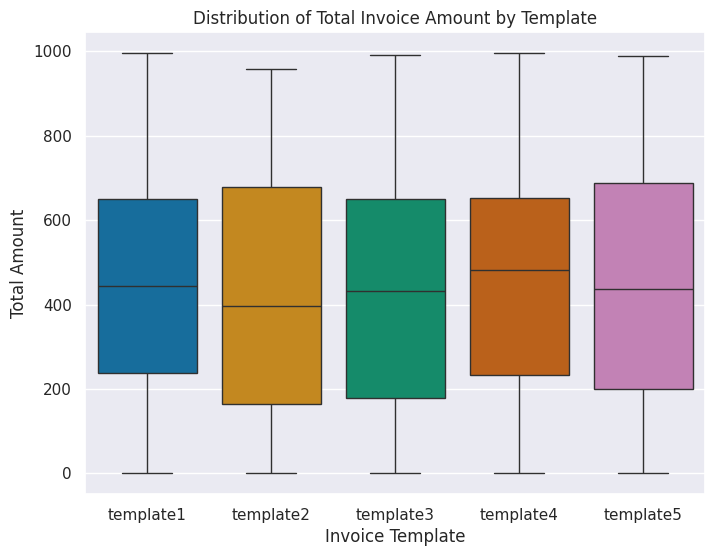

In [17]:
plt.figure(figsize=(8, 6))
sns.set_theme(style="darkgrid")
sns.set_context('notebook')
sns.boxplot(
    data=data,
    x="source_template",
    y="TOTAL_AMOUNT",
    palette='colorblind'
)

plt.title("Distribution of Total Invoice Amount by Template")
plt.xlabel("Invoice Template")
plt.ylabel("Total Amount")

plt.show()

<ins><strong>Analytical Question:</strong></ins>

Are invoice amounts distributed differently across templates?

<ins><strong>Interpretation:</strong></ins>

The boxplot analysis reveals comparable central tendencies and dispersion of invoice amounts across templates, with no template exhibiting extreme monetary deviations. This indicates that fraud detection in this dataset cannot rely solely on value-based outliers and must instead focus on contextual and cross-field inconsistencies, reinforcing the need for multi-signal reasoning mechanisms.

<ins><strong>Key Insights Highlighted:</strong></ins>

* Absence of extreme outliers
* Shift from rule-based to contextual fraud detection


####<h4 style="color:indianred"><em>8. <ins>Invoice Title Distribution Across Templates</ins></em></h4>

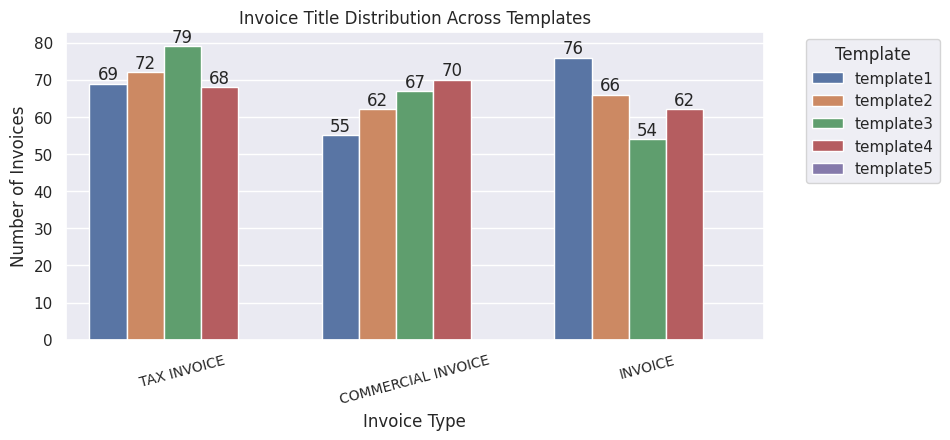

In [18]:
plt.figure(figsize=(9, 4))
sns.set_theme(style="darkgrid")
sns.set_context('notebook')
ax = sns.countplot(
    data=data,
    x="TITLE",
    hue="source_template"
)

plt.title("Invoice Title Distribution Across Templates")
plt.xlabel("Invoice Type")
plt.ylabel("Number of Invoices")
plt.xticks(rotation=15, fontsize=10)
plt.legend(title="Template", bbox_to_anchor=(1.05, 1), loc="upper left")

for container in ax.containers:
    ax.bar_label(container)
plt.show()

<ins><strong>Analytical Question:</strong></ins>

Do invoice types vary across templates, indicating structural heterogeneity?

<ins><strong>Interpretation:</strong></ins>

The distribution of invoice titles varies notably across templates, indicating structural and semantic heterogeneity in invoice formats. Certain templates emphasize tax invoices, while others include commercial or generic invoice types. This variation demonstrates why rigid, template-specific validation rules may fail to generalize and supports the adoption of Agentic AI systems capable of reasoning across heterogeneous invoice semantics.

<ins><strong>Key Insights Highlighted:</strong></ins>

* Semantic variability
* Direct justification for Agentic AI

####<h4 style="color:indianred"><em>9. <ins>Buyer Data Completeness Check</ins></em></h4>

In [19]:
buyer_cols = [col for col in data.columns if col.startswith("BUYER_")]
column_summary[column_summary["Column"].isin(buyer_cols)]

,Column,Data Type,Non-Null Count,Missing %
1,BUYER_addr_line1,object,600,40.0
2,BUYER_addr_line2,object,600,40.0
3,BUYER_city_state_postal_country,float64,0,100.0
4,BUYER_email,object,600,40.0
5,BUYER_name,object,600,40.0
6,BUYER_raw,object,600,40.0
7,BUYER_site,object,600,40.0
8,BUYER_tel,object,600,40.0


<ins><strong>Analytical Question:</strong></ins>

Has entity-level information been successfully normalized post-cleaning?

<ins><strong>Interpretation:</strong></ins>

Buyer-related attributes such as name, address, and contact details are largely populated in structured form, indicating successful normalization. Remaining gaps are template-driven rather than extraction failures, supporting selective reasoning rather than blanket imputation.

<ins><strong>Key Insights Highlighted:</strong></ins>

* Effective entity extraction
* Controlled, explainable incompleteness

####<h4 style="color:indianred"><em>10. <ins>Raw vs Structured Field Presence</ins></em></h4>

In [20]:
data[[
    "BUYER_raw",
    "BUYER_name",
    "BUYER_email",
    "TOTAL",
    "TOTAL_AMOUNT",
    "TOTAL_WORDS"
]].head(3)

,BUYER_raw,BUYER_name,BUYER_email,TOTAL,TOTAL_AMOUNT,TOTAL_WORDS
0,Bill to:Denise Perez | 16424 Timothy Mission |...,Bill to:Denise Perez,melvin40@example.net,TOTAL : 734.33 EUR,734.33,Total in words: seven hundred and thirt-\ny-f...
1,Buyer :Timothy Clark | 62035 Daniel Cove Suite...,Buyer :Timothy Clark,millschristopher@example.com,TOTAL : 1357.49 EUR,7.49,"Total in words: one thousand, three hundred a..."
2,Bill to:Angel Bailey | 265 Ochoa Manors Apt. 5...,Bill to:Angel Bailey,baileygary@example.net,TOTAL : 744.38 EUR,744.38,Total in words: seven hundred and forty-\n-fo...


<ins><strong>Analytical Question:</strong></ins>

Does the dataset preserve auditability alongside structured extraction?

<ins><strong>Interpretation:</strong></ins>

The simultaneous availability of raw OCR text and normalized structured fields enables transparent verification of extracted values. This dual representation supports explainability and human-in-the-loop auditing, which are critical for trustworthy AI systems in financial contexts.

<ins><strong>Key Insights Highlighted:</strong></ins>

* High auditability
* Strong interpretability foundation

**EDA complete:** Dataset is clean, structured, and ready for feature engineering and modeling.

### Outliers Analysis

####<h4 style="color:indianred"><em>1. <ins>Identify Outliers (IQR Method)</ins></em></h4>

In [21]:
# Identify outliers using IQR method
Q1 = data["TOTAL_AMOUNT"].quantile(0.25)
Q3 = data["TOTAL_AMOUNT"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data["is_outlier"] = (
    (data["TOTAL_AMOUNT"] < lower_bound) |
    (data["TOTAL_AMOUNT"] > upper_bound)
)

####<h4 style="color:indianred"><em>2. <ins>Boxplot, Currency Hue and Outlier Highlighting</ins></em></h4>

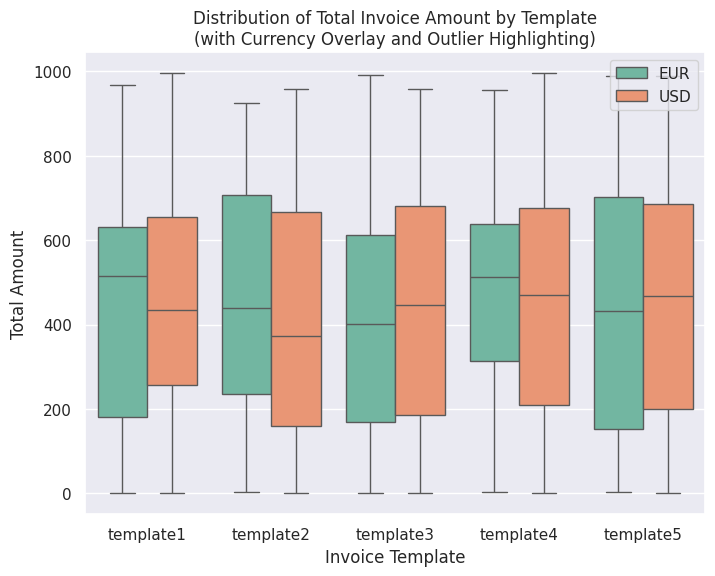

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

sns.set_theme(style="darkgrid")
sns.set_context("notebook")

# Boxplot with currency hue
sns.boxplot(
    data=data,
    x="source_template",
    y="TOTAL_AMOUNT",
    hue="CURRENCY",
    palette="Set2",
    dodge=True,
    showfliers=False  # hide default fliers (we plot them manually)
)

# Overlay outliers as red points
sns.stripplot(
    data=data[data["is_outlier"]],
    x="source_template",
    y="TOTAL_AMOUNT",
    color="red",
    size=5,
    jitter=True,
    dodge=True,
    alpha=0.7,
    label="Outliers"
)

plt.title("Distribution of Total Invoice Amount by Template\n(with Currency Overlay and Outlier Highlighting)")
plt.xlabel("Invoice Template")
plt.ylabel("Total Amount")

plt.legend(loc="upper right")
plt.show()

####<h4 style="color:indianred"><em>3. <ins>Outlier Summary by Template</ins></em></h4>

In [23]:
outlier_summary = (
    data
    .groupby("source_template")
    .agg(
        total_invoices=("TOTAL_AMOUNT", "count"),
        outlier_count=("is_outlier", "sum")
    )
    .reset_index()
)

outlier_summary["outlier_percentage"] = (
    outlier_summary["outlier_count"] / outlier_summary["total_invoices"] * 100
).round(2)

outlier_summary

,source_template,total_invoices,outlier_count,outlier_percentage
0,template1,200,0,0.0
1,template2,200,0,0.0
2,template3,200,0,0.0
3,template4,200,0,0.0
4,template5,200,0,0.0


<ins><strong>Analytical Question:</strong></ins>

Are extreme invoice amounts present in the dataset?

<ins><strong>Interpretation:</strong></ins>

Interquartile range–based analysis does not identify statistically significant outliers in invoice total amounts. This finding suggests that the dataset is designed with realistic value bounds and shifts analytical focus from extreme-value detection to structural and semantic inconsistencies.

<ins><strong>Key Insights Highlighted:</strong></ins>

* Absence of numeric outliers
* Reinforces non-rule-based fraud detection